In [40]:
import numpy as np
import pylab as pl
import sys

sys.path.append("../")

from pvp.common.loggers import DataLogger
dl = DataLogger()

In [41]:
files = ["./data/2020-08-28-14-50_controller_log.0.h5","./data/2020-08-28-14-50_controller_log.1.h5",
         "./data/2020-08-28-14-50_controller_log.2.h5", "./data/2020-08-28-14-50_controller_log.3.h5"]

In [42]:
counter = 0
data_time = {}
data_pressure = {}
data_flowout = {}
time_list = np.array([])
control_out = np.array([])
for filename in files:
    print(filename)
    dff = dl.load_file(filename)
    ls_wv = dff['waveform_data']
    ls_ct = dff['control_data']
    time_list = np.append(time_list, ls_wv['timestamp'])   #to find the glitches
    control_out = np.append(control_out, ls_wv['control_out'])
    
    tt = ls_wv['timestamp']
    pp = ls_wv['pressure']
    flow = ls_wv['flow_out']
    # Get all pressure data:
    for cycle in np.unique(ls_wv['cycle_number']):
        flag = ls_wv['cycle_number'] == cycle
        data_time[counter] = tt[flag] - np.min(tt[flag])
        data_pressure[counter] = pp[flag]
        data_flowout[counter] = flow[flag]
        counter = counter + 1

# time_list = np.sort(time_list)

./data/2020-08-28-14-50_controller_log.0.h5
Reading... ./data/2020-08-28-14-50_controller_log.0.h5
./data/2020-08-28-14-50_controller_log.1.h5
Reading... ./data/2020-08-28-14-50_controller_log.1.h5
./data/2020-08-28-14-50_controller_log.2.h5
Reading... ./data/2020-08-28-14-50_controller_log.2.h5
./data/2020-08-28-14-50_controller_log.3.h5
Reading... ./data/2020-08-28-14-50_controller_log.3.h5


In [5]:
pressure_all = np.array([])
flow_all = np.array([])
time_all = np.array([])
for idx in range(len(data_time)):
    pressure_all = np.append(pressure_all, data_pressure[idx])
    flow_all = np.append(flow_all, data_flowout[idx])
    time_all = np.append(time_all, data_time[idx])

In [6]:
t_resampled = np.arange(-0.025, 3.025, 0.05)
digitized = np.digitize(time_all, bins=t_resampled)

In [7]:
data_resampled = np.zeros(len(t_resampled))
data_resampled_std = np.zeros(len(t_resampled))

for i in range(np.max(digitized)):
    data_resampled[i] = np.mean(pressure_all[digitized == i])
    data_resampled_std[i] = np.std(pressure_all[digitized == i])

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [8]:
flow_data_resampled = np.zeros(len(t_resampled))
flow_data_resampled_std = np.zeros(len(t_resampled))

for i in range(np.max(digitized)):
    flow_data_resampled[i] = np.mean(flow_all[digitized == i])
    flow_data_resampled_std[i] = np.std(flow_all[digitized == i])

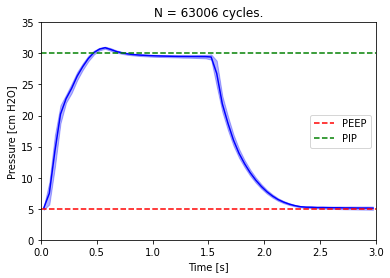

In [9]:
fig = pl.figure() 
pl.plot(t_resampled, data_resampled, color='blue')

# Shade the area between +-std
pl.fill_between(t_resampled, data_resampled-data_resampled_std, data_resampled+data_resampled_std, color='blue', alpha=0.3)

pl.plot([0,3],[5,5],'r--', label = "PEEP")
pl.plot([0,3],[30,30], 'g--', label = "PIP")
pl.xlim([0,3])
pl.ylim([0,35])
pl.xlabel("Time [s]")
pl.ylabel("Pressure [cm H2O]");
pl.title("N = " + str(len(data_time)) + " cycles.")
pl.legend()

pl.savefig("./waveform_measurements_std.svg", dpi=200)

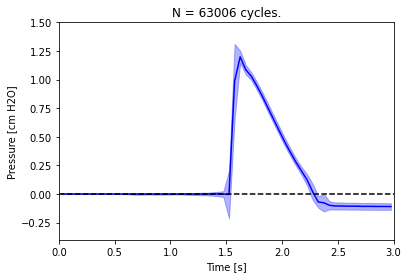

In [8]:
fig = pl.figure() 
pl.plot(t_resampled, flow_data_resampled, color='blue')
pl.plot([0,3], [0,0], 'k--')

# Shade the area between +-std
pl.fill_between(t_resampled, flow_data_resampled-flow_data_resampled_std, flow_data_resampled+flow_data_resampled_std, color='blue', alpha=0.3)
pl.xlim([0,3])
pl.ylim([-0.4,1.5])
pl.xlabel("Time [s]")
pl.ylabel("Pressure [cm H2O]");
pl.title("N = " + str(len(data_time)) + " cycles.")

pl.savefig("./flow_measurements_std.svg", dpi=200)

In [36]:
ls

HOWTO_PlotData.ipynb            example_logfile/
HOWTO_RunController.ipynb       make_average_plots.ipynb
Untitled.ipynb                  start_Controller_pi.py
combined_waveforms.svg          start_UI_pi.py
data/                           testcode/
delay_measurement_frequency.py  waveform_measurements_std.svg
delay_measurement_steps.py


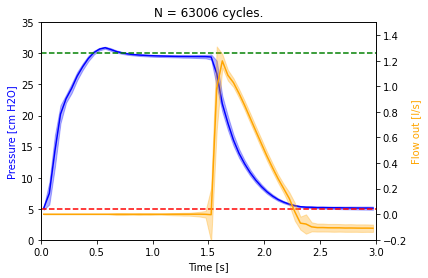

In [35]:
fig, ax1 = pl.subplots()
ax2 = ax1.twinx()

ax1.plot(t_resampled, data_resampled, color='blue', label = "Pressure")
ax2.plot(t_resampled, flow_data_resampled, color='orange', label = "Flow")

# Shade the area between +-std
ax1.fill_between(t_resampled, data_resampled-data_resampled_std, data_resampled+data_resampled_std, color='blue', alpha=0.3)
ax2.fill_between(t_resampled, flow_data_resampled-flow_data_resampled_std, flow_data_resampled+flow_data_resampled_std, color='orange', alpha=0.3)

ax1.plot([0,3],[5,5],'r--', label = "PEEP")
ax1.plot([0,3],[30,30], 'g--', label = "PIP")
ax1.set_xlim([0,3])
ax1.set_ylim([0,35])
ax1.set_xlabel("Time [s]")
ax1.set_ylabel('Pressure [cm H2O]', color='b')
ax2.set_ylabel('Flow out [l/s]', color='orange')
ax2.set_xlim([0,3])
ax2.set_ylim([-0.2,1.5])

pl.title("N = " + str(len(data_time)) + " cycles.")

pl.savefig("./combined_waveforms.svg", dpi=200)

In [33]:
1000/np.median(np.diff(time_list)*1000)

142.13161640121993

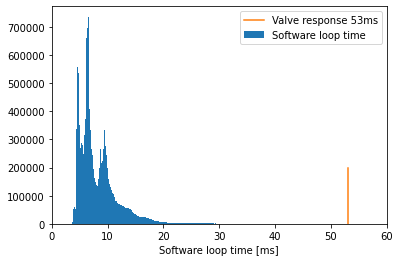

In [31]:
pl.hist(np.diff(time_list)*1000,np.arange(0,50,0.1), label = "Software loop time");
pl.plot([53, 53], [0,200000], label='Valve response 53ms')
pl.xlabel('Software loop time [ms]')
pl.xlim([0,60])
pl.legend()